<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Intro-to-statistic-basics" data-toc-modified-id="Intro-to-statistic-basics-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Intro to statistic basics</a></span><ul class="toc-item"><li><span><a href="#Settings-for-slideshow" data-toc-modified-id="Settings-for-slideshow-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Settings for slideshow</a></span></li><li><span><a href="#Import-some-libraries-and-generate-random-numbers" data-toc-modified-id="Import-some-libraries-and-generate-random-numbers-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Import some libraries and generate random numbers</a></span></li><li><span><a href="#Generate-the-continuous-variables-into-descrete-variables" data-toc-modified-id="Generate-the-continuous-variables-into-descrete-variables-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Generate the continuous variables into descrete variables</a></span></li><li><span><a href="#Barplot-of-destribution-and-cumulative-distribution" data-toc-modified-id="Barplot-of-destribution-and-cumulative-distribution-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Barplot of destribution and cumulative distribution</a></span><ul class="toc-item"><li><span><a href="#Calculation-of:" data-toc-modified-id="Calculation-of:-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Calculation of:</a></span></li><li><span><a href="#Boxplot-af-DataFrame" data-toc-modified-id="Boxplot-af-DataFrame-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Boxplot af DataFrame</a></span></li><li><span><a href="#Correlation" data-toc-modified-id="Correlation-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Correlation</a></span></li></ul></li></ul></li><li><span><a href="#Basics-of-Probability-Theory" data-toc-modified-id="Basics-of-Probability-Theory-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Basics of Probability Theory</a></span></li></ul></div>

# Intro to statistic basics
Let start with some basics

## Settings for slideshow
How to set backimage and stuff.

In [7]:
from traitlets.config.manager import BaseJSONConfigManager

path = "/home/anton/anaconda3/etc/jupyter/nbconfig"
cm = BaseJSONConfigManager(config_dir=path)
cm.update("livereveal", {
                          "backimage": "vorlage.jpg",
                          'scroll': True,
                          "theme": "grey",
                          'width': 1300,
                          'height': 900,
})

{'backimage': 'vorlage.jpg',
 'height': 900,
 'scroll': True,
 'theme': 'grey',
 'width': 1300}

**Set the plot setting.**

In [8]:
from jupyterthemes import jtplot
jtplot.style(ticks=True, grid=True, figsize=(10, 8), spines=False, context='paper', gridlines='--',theme='grade3' )

## Import some libraries and generate random numbers

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd

**a,b are continuous random variables**

In [10]:
rgen = ((np.random.randint(-10,10),np.random.randint(-10,10)) for _ in range(10))
data = {n: np.random.normal(i, 1, 1000)+np.linspace(np.min(r), np.max(r),1000) for r,n,i in zip(rgen,'abcdefgh', range(1,9))}
df = pd.DataFrame(data)
print(df.head())

          a         b         c         d         e         f         g  \
0 -7.533942 -7.966332  5.739033  2.779440  2.903527  1.110654 -2.107322   
1 -4.163767 -9.746227  5.968727  1.141934  2.537084 -1.466902 -2.904258   
2 -5.703592 -8.702226  6.519336  1.194946  3.456226  1.552552 -2.727756   
3 -5.295764 -7.414649  3.436607 -0.318623  2.281954 -0.115032 -2.446436   
4 -6.601542 -7.272869  5.704302  1.654418  4.619888  1.256028 -2.133936   

          h  
0 -1.711532  
1 -1.042539  
2 -1.949704  
3 -1.416357  
4 -0.688473  


## Generate the continuous variables into descrete variables 

With **pandas.cut(varriable, number_of_slices)** and

**Series.groupby(*slices*).count()** 

In [11]:
c = pd.cut(df['a'], 100)
c

0      (-7.582, -7.427]
1      (-4.172, -4.018]
2      (-5.722, -5.567]
3      (-5.412, -5.257]
4      (-6.652, -6.497]
5      (-5.877, -5.722]
6      (-6.962, -6.807]
7      (-7.737, -7.582]
8      (-6.962, -6.807]
9      (-5.102, -4.947]
10     (-3.398, -3.243]
11     (-4.172, -4.018]
12     (-4.792, -4.637]
13     (-5.722, -5.567]
14     (-7.117, -6.962]
15     (-6.962, -6.807]
16     (-5.412, -5.257]
17     (-6.652, -6.497]
18     (-6.342, -6.187]
19     (-5.877, -5.722]
20     (-5.412, -5.257]
21     (-6.807, -6.652]
22     (-6.652, -6.497]
23     (-7.272, -7.117]
24     (-4.792, -4.637]
25     (-4.018, -3.863]
26     (-4.172, -4.018]
27     (-5.877, -5.722]
28     (-5.877, -5.722]
29     (-8.683, -8.512]
             ...       
970      (2.337, 2.492]
971      (5.747, 5.902]
972      (4.662, 4.817]
973      (4.352, 4.507]
974      (3.577, 3.732]
975      (2.492, 2.647]
976      (1.717, 1.872]
977      (4.042, 4.197]
978      (4.817, 4.972]
979      (3.112, 3.267]
980      (3.577,

In [12]:
af = df['a'].groupby(c).count()
af

a
(-8.683, -8.512]     1
(-8.512, -8.357]     0
(-8.357, -8.202]     0
(-8.202, -8.047]     0
(-8.047, -7.892]     1
(-7.892, -7.737]     0
(-7.737, -7.582]     1
(-7.582, -7.427]     1
(-7.427, -7.272]     0
(-7.272, -7.117]     1
(-7.117, -6.962]     6
(-6.962, -6.807]     6
(-6.807, -6.652]     5
(-6.652, -6.497]     5
(-6.497, -6.342]     3
(-6.342, -6.187]     2
(-6.187, -6.032]     2
(-6.032, -5.877]     8
(-5.877, -5.722]    11
(-5.722, -5.567]    11
(-5.567, -5.412]     8
(-5.412, -5.257]     8
(-5.257, -5.102]    12
(-5.102, -4.947]    13
(-4.947, -4.792]    12
(-4.792, -4.637]    14
(-4.637, -4.482]    19
(-4.482, -4.327]    15
(-4.327, -4.172]    17
(-4.172, -4.018]    22
                    ..
(2.182, 2.337]      15
(2.337, 2.492]      17
(2.492, 2.647]      23
(2.647, 2.802]      17
(2.802, 2.957]      13
(2.957, 3.112]      13
(3.112, 3.267]       7
(3.267, 3.422]      11
(3.422, 3.577]      10
(3.577, 3.732]       9
(3.732, 3.887]       8
(3.887, 4.042]       8
(4.042, 4

## Barplot of destribution and cumulative distribution

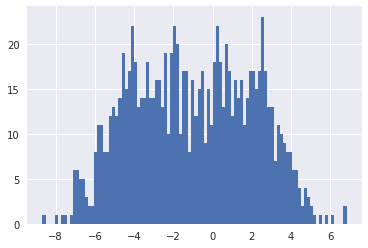

In [13]:
x = [i.mid for i in af.index]
y = af.values#[:,0]
w = [i.right-i.left for i in af.index]
a = plt.bar(x,y, w)

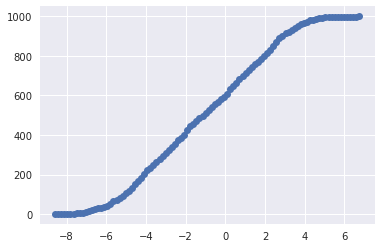

In [14]:
y_acc = np.add.accumulate(y)
a = plt.plot(x,y_acc, '--o')

### Calculation of:
1. Left
 * Variation
 * Mean
 * Median
 * Mode
 * Quantile(q=0.2)
2. Right
 * summary of all with **df.describe()**

In [15]:
def pf(*args):
    for i in args:
        print(i, end='\n')

In [16]:
pf(df['a'].var(),
   df['a'].mean(),
   df['a'].median(),
   af.mode(),
   af.quantile(q=0.2))

9.261092883769921
-1.0189977281858136
-1.0281443803550414
0    0
dtype: int64
1.8000000000000007


In [17]:
summary = df.describe()
summary

,a,b,c,d,e,f,g,h
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-1.018998,-2.530251,6.465789,1.996381,5.035180,3.982474,-2.991760,3.531228
std,3.043204,3.320631,1.094784,1.133674,1.450147,2.548589,1.009692,2.771468
min,-8.667186,-9.746227,2.885699,-1.305440,0.580352,-2.341299,-6.304366,-2.304028
25%,-3.522049,-5.242907,5.715150,1.223762,4.006294,1.976136,-3.705089,1.362631
50%,-1.028144,-2.454486,6.499248,1.996328,5.018898,3.923450,-2.978447,3.569031
75%,1.497363,0.190347,7.235258,2.740732,6.086684,6.019325,-2.316940,5.829910
max,6.831764,4.927901,9.265591,5.157007,9.183086,9.887708,0.381825,9.869005


### Boxplot af DataFrame

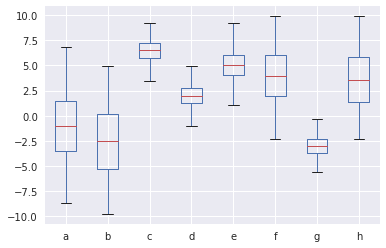

In [18]:
a = df.boxplot()
plt.show()

### Correlation 

\begin{equation}
r = \frac{\sum\limits_{i=1}^n (x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\sum\limits_{i=1}^n (x_i-\bar{x})^2\sum\limits_{i=1}^n (y_i-\bar{y})^2}}
\end{equation}


In [19]:
print(np.corrcoef(df.a.values, df.b.values))
np.correlate(df.a.values, df.b.values)

[[ 1.         0.8981976]
 [ 0.8981976  1.       ]]


array([ 11645.85258797])

**With a scatter_matrix the correlation can be shown in plots.**

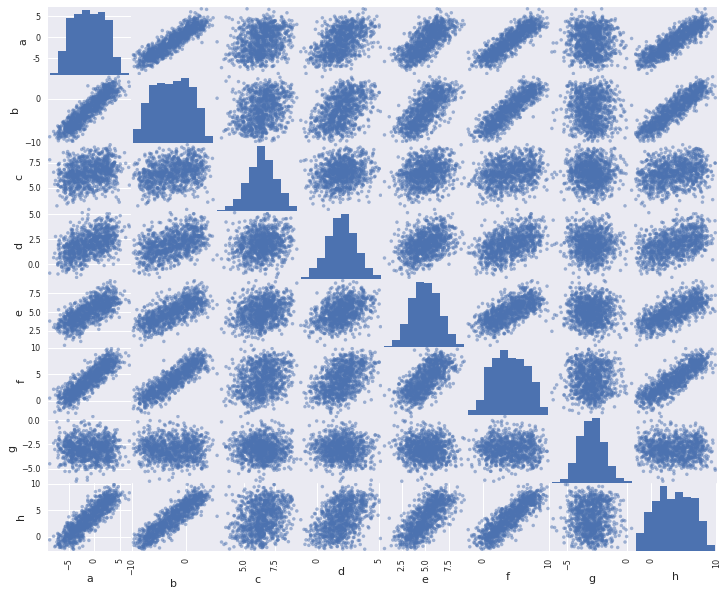

In [20]:
a = pd.plotting.scatter_matrix(df, figsize=(12,10))

# Basics of Probability Theory